In [1]:
import pandas as pd
import numpy as np
import random as rnd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier #as ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
import sys
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [5]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
classifier = Sequential()

In [6]:
train_df = pd.read_csv(r'C:\Users\keert\Downloads\train.csv')
test_df = pd.read_csv(r'C:\Users\keert\Downloads\test.csv')
combine = [train_df, test_df]

In [7]:
train = pd.read_csv(r'C:\Users\keert\Downloads\train.csv') 
test = pd.read_csv(r'C:\Users\keert\Downloads\test.csv') 

In [10]:
print("Total number of passengers in training dataset",len(train))
print("Totalnumber of passengers who survived in training dataset",len(train[train["Survived"]==1]))

Total number of passengers in training dataset 891
Totalnumber of passengers who survived in training dataset 342


In [11]:
men=len(train[(train["Survived"]==1)&(train["Sex"]=="male")])
women=len(train[(train["Survived"]==1) & (train["Sex"]=="female")])
print("men survived number",men)
print("women survived number",women)

men survived number 109
women survived number 233


In [12]:
print("percentage of men who survived",100*(men/(len(train[train["Sex"]=="male"]))))
print("percentage of women who survived",100*(women/(len(train[train["Sex"]=="female"]))))

percentage of men who survived 18.890814558058924
percentage of women who survived 74.20382165605095


In [13]:
class1=len(train[(train["Survived"]==1)&(train["Pclass"]==1)])
class2=len(train[(train["Survived"]==1) & (train["Pclass"]==2)])
class3=len(train[(train["Survived"]==1)&(train["Pclass"]==3)])

In [14]:
print("percentage of Passengers who survived in class 1", 100*(class1/len(train[train["Pclass"]==1])))
print("percentage of Passengers who survived in class 2", 100*(class2/len(train[train["Pclass"]==2])))
print("percentage of Passengers who survived in class 3", 100*(class3/len(train[train["Pclass"]==3])))

percentage of Passengers who survived in class 1 62.96296296296296
percentage of Passengers who survived in class 2 47.28260869565217
percentage of Passengers who survived in class 3 24.236252545824847


In [15]:
children=len(train[(train["Survived"]==1)&(train["Age"]<18)])
adult=len(train[(train["Survived"]==1)&(train["Age"]>18)])

In [16]:
print("percentage of children who survived",100*(children/len(train[train["Age"]<18])))
print("percentage of adult who survived",100*(adult/len(train[train["Age"]>18])))

percentage of children who survived 53.98230088495575
percentage of adult who survived 38.26086956521739


In [17]:
train["Sex"] = train["Sex"].apply(lambda x: 1 if x=="male" else 0)
train = train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
train["Age"] = train["Age"].fillna(np.mean(train["Age"]))
train["Fare"] = train["Fare"].fillna(np.mean(train["Fare"]))

In [18]:
Y = train["Survived"]
X = train.drop("Survived",axis=1)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [20]:
from sklearn.metrics import accuracy_score
print('Training accuracy...', accuracy_score(Y_train, classifier.predict(X_train)))
print('Validation accuracy', accuracy_score(Y_test, classifier.predict(X_test)))

Training accuracy... 0.9798657718120806
Validation accuracy 0.7322033898305085


In [21]:
classifier = DecisionTreeClassifier(max_depth = 3)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [22]:
print('Training accuracy...', accuracy_score(Y_train, classifier.predict(X_train)))
print('Validation accuracy', accuracy_score(Y_test, classifier.predict(X_test)))

Training accuracy... 0.8238255033557047
Validation accuracy 0.8203389830508474


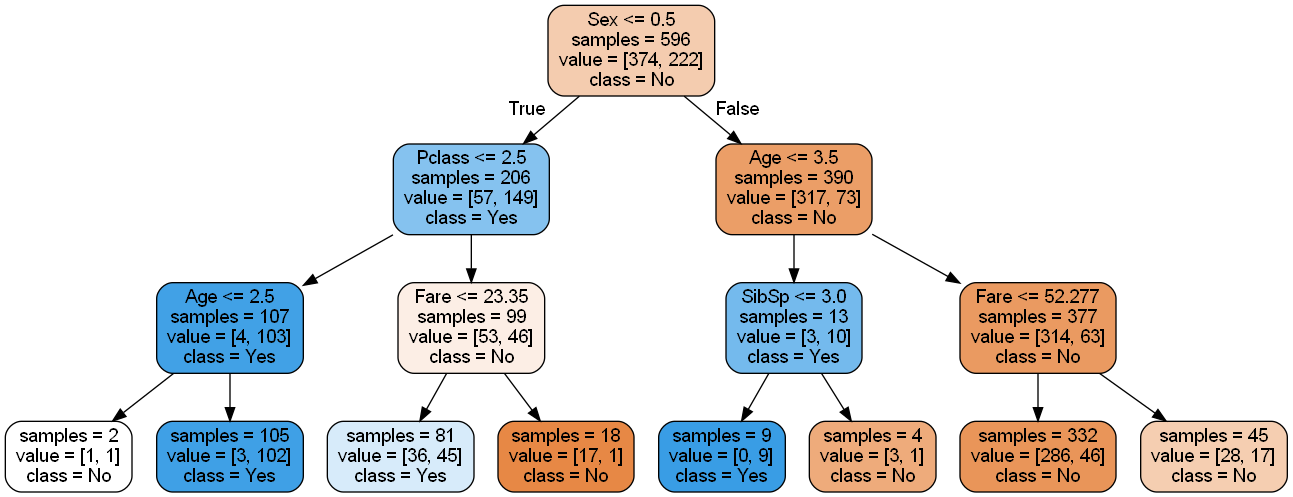

In [23]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(classifier,
                              out_file=f,
                              impurity = False,
                              feature_names = X_test.columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
        

check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])


img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png")

In [24]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 5)
acc_decision_tree

97.98658

In [25]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 5)
acc_random_forest

97.98658

In [27]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1

for train_index, test_index in kf.split(X, Y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 712, Test set:179
Fold:2, Train set: 713, Test set:178
Fold:3, Train set: 713, Test set:178
Fold:4, Train set: 713, Test set:178
Fold:5, Train set: 713, Test set:178


In [28]:
score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.7877095  0.84831461 0.76966292 0.75842697 0.80898876]
Average score: 0.79


In [29]:
score = cross_val_score(RandomForestClassifier(random_state= 42), X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.83240223 0.80898876 0.80898876 0.80898876 0.84831461]
Average score: 0.82
